In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
airfare=pd.read_csv('../Turbulence-in-Ticket-Prices-Regional-Airfare-Insights/data/Consumer_Airfare_Report__Table_1a.csv')
fare_increase=pd.read_csv('../Turbulence-in-Ticket-Prices-Regional-Airfare-Insights/data/Consumer_Airfare_Report__Table_3.csv')
fare_decrease=pd.read_csv('../Turbulence-in-Ticket-Prices-Regional-Airfare-Insights/data/Consumer_Airfare_Report__Table_4.csv')
airline_codes=pd.read_csv('../Turbulence-in-Ticket-Prices-Regional-Airfare-Insights/data/airline_codes.csv', encoding="latin1")

In [3]:
airfare

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255775,Table1a,2025,2,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12197,TYS,...,290.25,AA,0.5532,267.15,AA,0.5532,267.15,NaN,NaN,202521541212197TYSHPN
255776,Table1a,2025,2,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12478,TYS,...,299.01,AA,0.6292,248.68,AA,0.6292,248.68,NaN,NaN,202521541212478TYSJFK
255777,Table1a,2025,2,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,...,234.40,DL,0.5498,251.58,AA,0.4403,211.89,NaN,NaN,202521541212953TYSLGA
255778,Table1a,2025,2,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,...,129.94,G4,0.8460,95.94,G4,0.8460,95.94,NaN,NaN,202521541211697TYSFLL


In [4]:
airfare['Year'].unique()

array([2021, 2022, 2023, 2024, 2010, 1998, 2009, 1993, 2007, 2003, 2005,
       2014, 2001, 2002, 2011, 1999, 2012, 2013, 1997, 2006, 1994, 1996,
       2004, 2000, 2008, 2019, 2015, 2017, 2016, 2018, 2020, 2025],
      dtype=int64)

In [5]:
airfare = airfare[airfare["Year"] >= 1996]

In [6]:
airfare['Year'].unique()

array([2021, 2022, 2023, 2024, 2010, 1998, 2009, 2007, 2003, 2005, 2014,
       2001, 2002, 2011, 1999, 2012, 2013, 1997, 2006, 1996, 2004, 2000,
       2008, 2019, 2015, 2017, 2016, 2018, 2020, 2025], dtype=int64)

In [7]:
fare_increase.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,cur_passengers,cur_fare,ly_fare,ly_passengers,amount_change,percent_change,amount_change_pax,percent_change_pax,Geocoded_City1,Geocoded_City2
0,Table 3,2025,2,30140,32211,"Albuquerque, NM","Las Vegas, NV",51230,192.12,161.97,59150,30.16,0.1862,-7920,-0.1339,NaN,NaN
1,Table 3,2025,2,30158,31454,"Atlantic City, NJ","Orlando, FL",45160,110.75,92.40,52260,18.35,0.1985,-7100,-0.1359,NaN,NaN
2,Table 3,2025,2,30158,32467,"Atlantic City, NJ","Miami, FL (Metropolitan Area)",23430,121.51,96.60,27480,24.91,0.2579,-4050,-0.1474,NaN,NaN
3,Table 3,2025,2,30189,32211,"Colorado Springs, CO","Las Vegas, NV",27090,201.10,165.63,32910,35.46,0.2141,-5820,-0.1768,NaN,NaN
4,Table 3,2025,2,30189,32575,"Colorado Springs, CO","Los Angeles, CA (Metropolitan Area)",23650,236.52,197.63,37470,38.89,0.1968,-13820,-0.3688,NaN,NaN


In [8]:
fare_increase['Year'].unique()

array([2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015,
       2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004,
       2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996], dtype=int64)

In [9]:
fare_decrease['Year'].unique()

array([2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015,
       2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004,
       2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996], dtype=int64)

## will work with data from 1996-2025

## Data exploration

In [12]:
airfare.shape

(243587, 23)

In [13]:
fare_increase.shape

(3326, 17)

In [14]:
fare_decrease.shape

(3090, 17)

In [15]:
airfare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243587 entries, 0 to 255779
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             243587 non-null  object 
 1   Year            243587 non-null  int64  
 2   quarter         243587 non-null  int64  
 3   citymarketid_1  243587 non-null  int64  
 4   citymarketid_2  243587 non-null  int64  
 5   city1           243587 non-null  object 
 6   city2           243587 non-null  object 
 7   airportid_1     243587 non-null  int64  
 8   airportid_2     243587 non-null  int64  
 9   airport_1       243587 non-null  object 
 10  airport_2       243587 non-null  object 
 11  nsmiles         243587 non-null  int64  
 12  passengers      243587 non-null  int64  
 13  fare            243587 non-null  float64
 14  carrier_lg      242166 non-null  object 
 15  large_ms        242166 non-null  float64
 16  fare_lg         242166 non-null  float64
 17  carrier_low    

In [16]:
fare_increase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tbl                 3326 non-null   object 
 1   Year                3326 non-null   int64  
 2   quarter             3326 non-null   int64  
 3   citymarketid_1      3326 non-null   int64  
 4   citymarketid_2      3326 non-null   int64  
 5   city1               3326 non-null   object 
 6   city2               3326 non-null   object 
 7   cur_passengers      3326 non-null   int64  
 8   cur_fare            3326 non-null   float64
 9   ly_fare             3326 non-null   float64
 10  ly_passengers       3326 non-null   int64  
 11  amount_change       3326 non-null   float64
 12  percent_change      3326 non-null   float64
 13  amount_change_pax   3326 non-null   int64  
 14  percent_change_pax  3326 non-null   float64
 15  Geocoded_City1      1860 non-null   object 
 16  Geocod

In [17]:
fare_decrease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tbl                 3090 non-null   object 
 1   Year                3090 non-null   int64  
 2   quarter             3090 non-null   int64  
 3   citymarketid_1      3090 non-null   int64  
 4   citymarketid_2      3090 non-null   int64  
 5   city1               3090 non-null   object 
 6   city2               3090 non-null   object 
 7   cur_passengers      3090 non-null   int64  
 8   cur_fare            3090 non-null   float64
 9   ly_fare             3090 non-null   float64
 10  ly_passengers       3090 non-null   int64  
 11  amount_change       3090 non-null   float64
 12  percent_change      3090 non-null   float64
 13  amount_change_pax   3090 non-null   int64  
 14  percent_change_pax  3090 non-null   float64
 15  Geocoded_City1      1975 non-null   object 
 16  Geocod

## Renaming columns across all data sets

In [19]:
rename_1a = {
    "airport_1": "OriginAirport",
    "airport_2": "DestAirport",
    "city1": "OriginCity",
    "city2": "DestCity",
    "nsmiles": "DistanceMiles",
    "passengers": "Passengers",
    "fare": "AvgFare",
    "carrier_lg": "LargestCarrier",
    "large_ms": "LargestCarrierShare",
    "fare_lg": "LargestCarrierFare",
    "carrier_low": "LowestFareCarrier",
    "lf_ms": "LowestCarrierShare",
    "fare_low": "LowestCarrierFare",
     "quarter": "Quarter"
}
airfare = airfare.rename(columns=rename_1a)

In [20]:
rename_3 = {
    "city1": "OriginCity",
    "city2": "DestCity",
    "cur_passengers": "CurrentPassengers",
    "cur_fare": "CurrentFare",
    "ly_fare": "LastYearFare",
    "ly_passengers": "LastYearPassengers",
    "amount_change": "FareChange",
    "percent_change": "FarePctChange",
    "amount_change_pax": "PassengerChange",
    "percent_change_pax": "PassengerPctChange",
    "Year": "Year",
    "quarter": "Quarter"
}
fare_increase = fare_increase.rename(columns=rename_3)

In [21]:
rename_4 = {
    "city1": "OriginCity",
    "city2": "DestCity",
    "cur_passengers": "CurrentPassengers",
    "cur_fare": "CurrentFare",
    "ly_fare": "LastYearFare",
    "ly_passengers": "LastYearPassengers",
    "amount_change": "FareChange",
    "percent_change": "FarePctChange",
    "amount_change_pax": "PassengerChange",
    "percent_change_pax": "PassengerPctChange",
    "Year": "Year",
    "quarter": "Quarter"
}
fare_decrease = fare_decrease.rename(columns=rename_4)

In [22]:
rename_airlines = {
    "CARRIER": "CarrierCode",
    "CARRIERNAME": "AirlineName"
}
airline_codes = airline_codes.rename(columns=rename_airlines)

## dropping columns

In [24]:
airfare = airfare.drop(columns=["citymarketid_1", "citymarketid_2",
                                "airportid_1", "airportid_2",
                                "Geocoded_City1", "Geocoded_City2", "tbl1apk"])

fare_increase = fare_increase.drop(columns=["citymarketid_1", "citymarketid_2",
                             "Geocoded_City1", "Geocoded_City2"])

fare_decrease = fare_decrease.drop(columns=["citymarketid_1", "citymarketid_2",
                             "Geocoded_City1", "Geocoded_City2"])

## Creating Columns

In [26]:
airfare.head()

,tbl,Year,Quarter,OriginCity,DestCity,OriginAirport,DestAirport,DistanceMiles,Passengers,AvgFare,LargestCarrier,LargestCarrierShare,LargestCarrierFare,LowestFareCarrier,LowestCarrierShare,LowestCarrierFare
0,Table1a,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,PIE,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43
1,Table1a,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11
2,Table1a,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DAL,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44
3,Table1a,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DFW,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09
4,Table1a,2021,3,"Albuquerque, NM","Phoenix, AZ",ABQ,PHX,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77


In [27]:
fare_increase.head()

,tbl,Year,Quarter,OriginCity,DestCity,CurrentPassengers,CurrentFare,LastYearFare,LastYearPassengers,FareChange,FarePctChange,PassengerChange,PassengerPctChange
0,Table 3,2025,2,"Albuquerque, NM","Las Vegas, NV",51230,192.12,161.97,59150,30.16,0.1862,-7920,-0.1339
1,Table 3,2025,2,"Atlantic City, NJ","Orlando, FL",45160,110.75,92.40,52260,18.35,0.1985,-7100,-0.1359
2,Table 3,2025,2,"Atlantic City, NJ","Miami, FL (Metropolitan Area)",23430,121.51,96.60,27480,24.91,0.2579,-4050,-0.1474
3,Table 3,2025,2,"Colorado Springs, CO","Las Vegas, NV",27090,201.10,165.63,32910,35.46,0.2141,-5820,-0.1768
4,Table 3,2025,2,"Colorado Springs, CO","Los Angeles, CA (Metropolitan Area)",23650,236.52,197.63,37470,38.89,0.1968,-13820,-0.3688


In [28]:
fare_decrease.head()

,tbl,Year,Quarter,OriginCity,DestCity,CurrentPassengers,CurrentFare,LastYearFare,LastYearPassengers,FareChange,FarePctChange,PassengerChange,PassengerPctChange
0,Table 4,2025,1,"Dallas/Fort Worth, TX","Seattle, WA",149300,214.40,274.92,128300,-60.52,-0.2201,21000,0.1637
1,Table 4,2025,1,"Dallas/Fort Worth, TX","Portland, OR",64800,242.82,304.78,55700,-61.96,-0.2033,9100,0.1634
2,Table 4,2025,1,"Appleton, WI","Phoenix, AZ",30070,166.30,196.87,21640,-30.57,-0.1553,8430,0.3896
3,Table 4,2025,1,"Appleton, WI","Tampa, FL (Metropolitan Area)",18280,141.97,167.22,15790,-25.25,-0.1510,2490,0.1577
4,Table 4,2025,1,"Birmingham, AL","Miami, FL (Metropolitan Area)",26160,235.86,332.03,15160,-96.18,-0.2897,11000,0.7256


In [29]:
airline_codes.head()

,CarrierCode,AirlineName
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,06Q,Master Top Linhas Aereas Ltd.
3,07Q,Flair Airlines Ltd.
4,09Q,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E..."


## concatenating data and merging airline codes

In [31]:
all_data = pd.concat([airfare, fare_increase, fare_decrease], ignore_index=False)

In [32]:
##all_data= airfare

In [33]:
all_data = all_data.merge(airline_codes, left_on="LargestCarrier", right_on="CarrierCode", how="left")

In [34]:
all_data['LastYearFare'].value_counts()

LastYearFare
190.14    4
176.54    4
145.21    4
195.12    4
177.31    4
         ..
132.43    1
110.12    1
115.62    1
138.28    1
143.07    1
Name: count, Length: 5651, dtype: int64

In [35]:
all_data['CurrentPassengers'].value_counts()

CurrentPassengers
21410.0     7
21020.0     7
18210.0     6
18140.0     6
25920.0     6
           ..
99080.0     1
41680.0     1
19380.0     1
265370.0    1
221810.0    1
Name: count, Length: 4624, dtype: int64

## Created two new columns for origin state and destination state... see bellow

In [37]:
all_data['OriginState']=all_data['OriginCity'].str.split(',').str[1]

In [38]:
all_data['OriginState'].value_counts()

OriginState
TX                        36699
CA (Metropolitan Area)    29426
MA (Metropolitan Area)    23629
NY (Metropolitan Area)    22902
IL                        18397
OH (Metropolitan Area)     9078
FL (Metropolitan Area)     8730
OH                         8441
FL                         6877
NC                         6073
MI                         5777
NY                         5376
CO                         5259
GA (Metropolitan Area)     4718
TN                         4682
SC                         4577
MO                         3865
NV                         3685
NM                         3246
AL                         3190
WI                         2806
IN                         2691
AZ                         2531
CT                         2136
OR                         1979
LA                         1884
AR                         1868
MN                         1851
KY                         1806
CA                         1801
IA                         1

In [39]:
all_data['OriginState']= all_data['OriginState'].str.replace(r"\s*\(.*?\)", "", regex=True).str.strip()

In [40]:
all_data['OriginState'].value_counts()

OriginState
TX    36699
CA    31227
NY    28278
MA    23787
IL    18397
OH    17519
FL    15607
NC     6073
MI     5777
CO     5259
GA     5056
TN     4682
SC     4577
MO     3865
NV     3685
NM     3246
AL     3190
WI     2806
IN     2691
AZ     2531
CT     2136
VA     2010
OR     1979
LA     1884
AR     1868
MN     1851
KY     1806
IA     1772
PA     1705
ID     1257
WA     1013
OK      990
NE      907
UT      827
VT      767
MT      440
MS      419
DC      387
ME      380
NJ      323
WY      170
ND      156
SD        2
WV        2
Name: count, dtype: int64

In [41]:
all_data['DestState']=all_data['DestCity'].str.split(',').str[1]

In [42]:
all_data['DestState'].value_counts()


DestState
CA (Metropolitan Area)    43700
NY (Metropolitan Area)    36509
DC (Metropolitan Area)    31423
FL (Metropolitan Area)    18472
TX                        15534
FL                        10958
AZ                         8278
CA                         6706
PA                         5780
VA (Metropolitan Area)     5676
MO                         5205
WA                         5047
TN                         4271
NC                         4210
OK                         4172
NV                         3627
OR                         3448
NY                         3146
UT                         2996
IL                         2810
MN                         2525
VA                         2355
NE                         2304
LA                         2199
WI                         2033
OH                         1870
OH (Metropolitan Area)     1724
KY                         1671
CO                         1419
GA                         1365
MI                         129

In [43]:
all_data['DestState']= all_data['DestState'].str.replace(r"\s*\(.*?\)", "", regex=True).str.strip()

In [44]:
all_data['DestState'].value_counts()

DestState
CA    50406
NY    39655
DC    31423
FL    29430
TX    15534
AZ     8278
VA     8031
PA     5780
MO     5205
WA     5047
TN     4271
NC     4210
OK     4172
NV     3627
OH     3594
OR     3448
UT     2996
IL     2810
MN     2525
NE     2304
LA     2199
WI     2033
KY     1671
CO     1419
GA     1373
MI     1295
IN     1266
SC     1208
MA     1113
AR      748
CT      680
ME      668
KS      575
MS      413
IA      329
SD      122
MT       88
NJ       40
AL       11
WY        4
ND        2
Name: count, dtype: int64

## created region columns usind the Census Bureau

In [46]:
region_mapping = {
    "CT": "Northeast", "ME": "Northeast", "MA": "Northeast", "NH": "Northeast", 
    "RI": "Northeast", "VT": "Northeast", "NJ": "Northeast", "NY": "Northeast", "PA": "Northeast",
    
    "IL": "Midwest", "IN": "Midwest", "MI": "Midwest", "OH": "Midwest", "WI": "Midwest",
    "IA": "Midwest", "KS": "Midwest", "MN": "Midwest", "MO": "Midwest",
    "NE": "Midwest", "ND": "Midwest", "SD": "Midwest",
    
    "DE": "South", "FL": "South", "GA": "South", "MD": "South", "NC": "South", "SC": "South", 
    "VA": "South", "DC": "South", "WV": "South", "AL": "South", "KY": "South", "MS": "South", 
    "TN": "South", "AR": "South", "LA": "South", "OK": "South", "TX": "South",
    
    "AZ": "West", "CO": "West", "ID": "West", "MT": "West", "NV": "West", 
    "NM": "West", "UT": "West", "WY": "West", "AK": "West", "CA": "West", 
    "HI": "West", "OR": "West", "WA": "West"
}

all_data["OriginRegion"] = all_data["OriginState"].map(region_mapping)
all_data["DestRegion"] = all_data["DestState"].map(region_mapping)

## Mapping airline code to names

In [48]:
all_data['LargestCarrier'].unique()

array(['G4', 'DL', 'WN', 'AA', 'UA', 'B6', 'AS', 'F9', 'NK', 'SY', '3M',
       'MX', nan, 'XP', 'US', 'CO', 'HP', 'YX', 'FL', 'NW', 'TW', 'RU',
       'DH', 'J7', 'TZ', 'JI', 'RP', 'P9', 'U5', 'N7', 'NJ', 'QQ', 'WV',
       'VX', 'KP', 'W7', 'HQ', 'FF', 'UK', 'LC', 'YY', 'PA', 'KW', 'YV',
       '9K', 'E9', 'PN', '9N', 'ZW', 'U2', 'W9', 'ZV', 'T3', 'OP', 'OO',
       'TB', 'AQ', 'QX', 'OH', 'KS', 'XJ', 'ZA', 'SX'], dtype=object)

In [49]:
airline_name_map = {
    "G4": "Allegiant Air",
    "DL": "Delta Air Lines",
    "WN": "Southwest Airlines",
    "AA": "American Airlines",
    "UA": "United Airlines",
    "B6": "JetBlue Airways",
    "AS": "Alaska Airlines",
    "F9": "Frontier Airlines",
    "NK": "Spirit Airlines",
    "SY": "Sun Country Airlines",
    "3M": "Silver Airways",
    "MX": "Breeze Airways",
    "XP": "Avelo Airlines",
    "US": "US Airways",
    "HP": "America West Airlines",
    "CO": "Continental Airlines",
    "YX": "Midwest Airlines",
    "FL": "AirTran Airways",
    "NW": "Northwest Airlines",
    "TW": "Trans World Airlines",
    "RU": "Continental Express",
    "DH": "Independence Air",
    "J7": "ValuJet Airlines",
    "TZ": "ATA Airlines",
    "JI": "Midway Airlines",
    "RP": "Chautauqua Airlines",
    "P9": "Pro Air",
    "U5": "USA3000 Airlines",
    "N7": "National Airlines",
    "NJ": "Vanguard Airlines",
    "QQ": "Reno Air",
    "WV": "Air South",
    "VX": "Virgin America",
    "KW": "Carnival Air Lines",
    "KP": "Kiwi International Air Lines",
    "ZW": "Air Wisconsin",
    "UK": "Air UK",
    "W7": "Western Pacific Airlines",
    "HQ": "Harmony Airways",
    "FF": "Tower Air",
    "TB": "Transmeridian Airlines",
    "LC": "Legend Airlines",
    "YY": "Republic Airlines",
    "PA": "Pan American World Airways",
    "YV": "Mesa Airlines",
    "5J": "Cebu Pacific Air",
    "KN": "China United Airlines",
    "9K": "Cape Air",
    "E9": "Boston-Maine Airways",
    "PN": "Pan American Airways",
    "BF": "MarkAir",
    "9N": "ANA Connection",
    "U2": "easyJet",
    "OE": "Lauda Europe",
    "W9": "Wizz Air UK",
    "ZV": "V Air",
    "RL": "Royal Air",
    "T3": "Eastern Airways",
    "OP": "Panorama Airlines",
    "OO": "SkyWest Airlines",
    "AQ": "Aloha Airlines",
    "QX": "Horizon Air",
    "OH": "Comair",
    "KS": "PenAir",
    "XJ": "Mesaba Airlines",
    "ZA": "AccessAir",
    "SX": "SkyBus Airlines",
    np.nan: np.nan
}

In [50]:
all_data["LargestCarrierName"] = all_data["LargestCarrier"].map(airline_name_map)
all_data["LowestFareCarrierName"] = all_data["LowestFareCarrier"].map(airline_name_map)

In [51]:
all_data

,tbl,Year,Quarter,OriginCity,DestCity,OriginAirport,DestAirport,DistanceMiles,Passengers,AvgFare,...,PassengerChange,PassengerPctChange,CarrierCode,AirlineName,OriginState,DestState,OriginRegion,DestRegion,LargestCarrierName,LowestFareCarrierName
0,Table1a,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,PIE,970.0,180.0,81.43,...,NaN,NaN,G4,Allegiant Air,PA,FL,Northeast,South,Allegiant Air,Allegiant Air
1,Table1a,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,TPA,970.0,19.0,208.93,...,NaN,NaN,DL,Delta Air Lines Inc.,PA,FL,Northeast,South,Delta Air Lines,United Airlines
2,Table1a,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DAL,580.0,204.0,184.56,...,NaN,NaN,WN,Southwest Airlines Co.,NM,TX,West,South,Southwest Airlines,Southwest Airlines
3,Table1a,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DFW,580.0,264.0,182.64,...,NaN,NaN,AA,American Airlines Inc.,NM,TX,West,South,American Airlines,American Airlines
4,Table1a,2021,3,"Albuquerque, NM","Phoenix, AZ",ABQ,PHX,328.0,398.0,177.11,...,NaN,NaN,WN,Southwest Airlines Co.,NM,AZ,West,West,Southwest Airlines,American Airlines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249998,Table 4,1996,1,"Kansas City, MO","Salt Lake City, UT",NaN,NaN,NaN,NaN,NaN,...,13210.0,1.3197,NaN,NaN,MO,UT,Midwest,West,NaN,NaN
249999,Table 4,1996,1,"Omaha, NE","Phoenix, AZ",NaN,NaN,NaN,NaN,NaN,...,14470.0,0.3689,NaN,NaN,NE,AZ,Midwest,West,NaN,NaN
250000,Table 4,1996,1,"Omaha, NE","St. Louis, MO",NaN,NaN,NaN,NaN,NaN,...,2300.0,0.1788,NaN,NaN,NE,MO,Midwest,Midwest,NaN,NaN
250001,Table 4,1996,1,"Milwaukee, WI","San Francisco, CA (Metropolitan Area)",NaN,NaN,NaN,NaN,NaN,...,9700.0,0.4857,NaN,NaN,WI,CA,Midwest,West,NaN,NaN


In [52]:
all_data['OriginRegion'].value_counts()

OriginRegion
South        85250
Northeast    57376
Midwest      55743
West         51634
Name: count, dtype: int64

In [53]:
all_data['DestRegion'].value_counts()

DestRegion
South        104694
West          75313
Northeast     47936
Midwest       22060
Name: count, dtype: int64

In [54]:
print(all_data.isnull().sum())

tbl                           0
Year                          0
Quarter                       0
OriginCity                    0
DestCity                      0
OriginAirport              6416
DestAirport                6416
DistanceMiles              6416
Passengers                 6416
AvgFare                    6416
LargestCarrier             7837
LargestCarrierShare        7837
LargestCarrierFare         7837
LowestFareCarrier          7905
LowestCarrierShare         7905
LowestCarrierFare          7905
CurrentPassengers        243587
CurrentFare              243587
LastYearFare             243587
LastYearPassengers       243587
FareChange               243587
FarePctChange            243587
PassengerChange          243587
PassengerPctChange       243587
CarrierCode               61487
AirlineName               61487
OriginState                   0
DestState                     0
OriginRegion                  0
DestRegion                    0
LargestCarrierName         7837
LowestFa

## Calculating the price difference per rout and its percentage

In [56]:
all_data["FareDifference"] = all_data["LargestCarrierFare"] - all_data["LowestCarrierFare"]

In [57]:
all_data["FareDifferencePct"] = ((all_data["FareDifference"] / all_data["LowestCarrierFare"]) * 100).round(2)

In [58]:
all_data

,tbl,Year,Quarter,OriginCity,DestCity,OriginAirport,DestAirport,DistanceMiles,Passengers,AvgFare,...,CarrierCode,AirlineName,OriginState,DestState,OriginRegion,DestRegion,LargestCarrierName,LowestFareCarrierName,FareDifference,FareDifferencePct
0,Table1a,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,PIE,970.0,180.0,81.43,...,G4,Allegiant Air,PA,FL,Northeast,South,Allegiant Air,Allegiant Air,0.00,0.00
1,Table1a,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,TPA,970.0,19.0,208.93,...,DL,Delta Air Lines Inc.,PA,FL,Northeast,South,Delta Air Lines,United Airlines,65.87,42.74
2,Table1a,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DAL,580.0,204.0,184.56,...,WN,Southwest Airlines Co.,NM,TX,West,South,Southwest Airlines,Southwest Airlines,0.00,0.00
3,Table1a,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DFW,580.0,264.0,182.64,...,AA,American Airlines Inc.,NM,TX,West,South,American Airlines,American Airlines,0.00,0.00
4,Table1a,2021,3,"Albuquerque, NM","Phoenix, AZ",ABQ,PHX,328.0,398.0,177.11,...,WN,Southwest Airlines Co.,NM,AZ,West,West,Southwest Airlines,American Airlines,18.72,11.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249998,Table 4,1996,1,"Kansas City, MO","Salt Lake City, UT",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,MO,UT,Midwest,West,NaN,NaN,NaN,NaN
249999,Table 4,1996,1,"Omaha, NE","Phoenix, AZ",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NE,AZ,Midwest,West,NaN,NaN,NaN,NaN
250000,Table 4,1996,1,"Omaha, NE","St. Louis, MO",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NE,MO,Midwest,Midwest,NaN,NaN,NaN,NaN
250001,Table 4,1996,1,"Milwaukee, WI","San Francisco, CA (Metropolitan Area)",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,WI,CA,Midwest,West,NaN,NaN,NaN,NaN


## Creating a year + quarter column

In [60]:
all_data["YearQuarter"] = all_data["Year"].astype(str) + "Q" + all_data["Quarter"].astype(str)

In [61]:
all_data

,tbl,Year,Quarter,OriginCity,DestCity,OriginAirport,DestAirport,DistanceMiles,Passengers,AvgFare,...,AirlineName,OriginState,DestState,OriginRegion,DestRegion,LargestCarrierName,LowestFareCarrierName,FareDifference,FareDifferencePct,YearQuarter
0,Table1a,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,PIE,970.0,180.0,81.43,...,Allegiant Air,PA,FL,Northeast,South,Allegiant Air,Allegiant Air,0.00,0.00,2021Q3
1,Table1a,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,TPA,970.0,19.0,208.93,...,Delta Air Lines Inc.,PA,FL,Northeast,South,Delta Air Lines,United Airlines,65.87,42.74,2021Q3
2,Table1a,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DAL,580.0,204.0,184.56,...,Southwest Airlines Co.,NM,TX,West,South,Southwest Airlines,Southwest Airlines,0.00,0.00,2021Q3
3,Table1a,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DFW,580.0,264.0,182.64,...,American Airlines Inc.,NM,TX,West,South,American Airlines,American Airlines,0.00,0.00,2021Q3
4,Table1a,2021,3,"Albuquerque, NM","Phoenix, AZ",ABQ,PHX,328.0,398.0,177.11,...,Southwest Airlines Co.,NM,AZ,West,West,Southwest Airlines,American Airlines,18.72,11.29,2021Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249998,Table 4,1996,1,"Kansas City, MO","Salt Lake City, UT",NaN,NaN,NaN,NaN,NaN,...,NaN,MO,UT,Midwest,West,NaN,NaN,NaN,NaN,1996Q1
249999,Table 4,1996,1,"Omaha, NE","Phoenix, AZ",NaN,NaN,NaN,NaN,NaN,...,NaN,NE,AZ,Midwest,West,NaN,NaN,NaN,NaN,1996Q1
250000,Table 4,1996,1,"Omaha, NE","St. Louis, MO",NaN,NaN,NaN,NaN,NaN,...,NaN,NE,MO,Midwest,Midwest,NaN,NaN,NaN,NaN,1996Q1
250001,Table 4,1996,1,"Milwaukee, WI","San Francisco, CA (Metropolitan Area)",NaN,NaN,NaN,NaN,NaN,...,NaN,WI,CA,Midwest,West,NaN,NaN,NaN,NaN,1996Q1


In [62]:
##all_data.to_csv('AirFareFinal2.csv', index=False)

In [63]:
all_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250003 entries, 0 to 250002
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   tbl                    250003 non-null  object 
 1   Year                   250003 non-null  int64  
 2   Quarter                250003 non-null  int64  
 3   OriginCity             250003 non-null  object 
 4   DestCity               250003 non-null  object 
 5   OriginAirport          243587 non-null  object 
 6   DestAirport            243587 non-null  object 
 7   DistanceMiles          243587 non-null  float64
 8   Passengers             243587 non-null  float64
 9   AvgFare                243587 non-null  float64
 10  LargestCarrier         242166 non-null  object 
 11  LargestCarrierShare    242166 non-null  float64
 12  LargestCarrierFare     242166 non-null  float64
 13  LowestFareCarrier      242098 non-null  object 
 14  LowestCarrierShare     242098 non-nu

In [64]:
all_data['FareChange'].sort_values(ascending = False).reset_index().head(30)

,index,FareChange
0,246904,251.13
1,244295,242.03
2,244320,208.78
3,244321,203.63
4,246111,203.01
5,244283,196.11
6,244288,195.99
7,244289,195.42
8,244286,193.25
9,244249,192.59


In [65]:
all_data[all_data['FareChange'] == 163.88]

,tbl,Year,Quarter,OriginCity,DestCity,OriginAirport,DestAirport,DistanceMiles,Passengers,AvgFare,...,AirlineName,OriginState,DestState,OriginRegion,DestRegion,LargestCarrierName,LowestFareCarrierName,FareDifference,FareDifferencePct,YearQuarter
244285,Table 3,2022,2,"Portland, OR","Tampa, FL (Metropolitan Area)",NaN,NaN,NaN,NaN,NaN,...,NaN,OR,FL,West,South,NaN,NaN,NaN,NaN,2022Q2


## creating distance category column 

In [67]:
def dist_category(d):
    if pd.isna(d): return np.nan
    if d < 500: return "Short (<500)"
    if d < 1500: return "Medium (500-1500)"
    return "Long (>1500)"

if "DistanceMiles" in all_data.columns:
    all_data["DistanceCategory"] = all_data["DistanceMiles"].apply(dist_category)

In [68]:
all_data.head()

,tbl,Year,Quarter,OriginCity,DestCity,OriginAirport,DestAirport,DistanceMiles,Passengers,AvgFare,...,OriginState,DestState,OriginRegion,DestRegion,LargestCarrierName,LowestFareCarrierName,FareDifference,FareDifferencePct,YearQuarter,DistanceCategory
0,Table1a,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,PIE,970.0,180.0,81.43,...,PA,FL,Northeast,South,Allegiant Air,Allegiant Air,0.00,0.00,2021Q3,Medium (500-1500)
1,Table1a,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,TPA,970.0,19.0,208.93,...,PA,FL,Northeast,South,Delta Air Lines,United Airlines,65.87,42.74,2021Q3,Medium (500-1500)
2,Table1a,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DAL,580.0,204.0,184.56,...,NM,TX,West,South,Southwest Airlines,Southwest Airlines,0.00,0.00,2021Q3,Medium (500-1500)
3,Table1a,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DFW,580.0,264.0,182.64,...,NM,TX,West,South,American Airlines,American Airlines,0.00,0.00,2021Q3,Medium (500-1500)
4,Table1a,2021,3,"Albuquerque, NM","Phoenix, AZ",ABQ,PHX,328.0,398.0,177.11,...,NM,AZ,West,West,Southwest Airlines,American Airlines,18.72,11.29,2021Q3,Short (<500)


In [69]:
 top_airports = (all_data.groupby("OriginAirport")["Passengers"].sum().nlargest(10).index.tolist())

In [70]:
top_airports

['ORD', 'BOS', 'LAX', 'DFW', 'ATL', 'MDW', 'LAS', 'FLL', 'DEN', 'IAH']

In [71]:
all_data["AvgFare_final"] = all_data[["AvgFare", "CurrentFare", "LargestCarrierFare"]].mean(axis=1, skipna=True).round(2)

In [72]:
all_data

,tbl,Year,Quarter,OriginCity,DestCity,OriginAirport,DestAirport,DistanceMiles,Passengers,AvgFare,...,DestState,OriginRegion,DestRegion,LargestCarrierName,LowestFareCarrierName,FareDifference,FareDifferencePct,YearQuarter,DistanceCategory,AvgFare_final
0,Table1a,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,PIE,970.0,180.0,81.43,...,FL,Northeast,South,Allegiant Air,Allegiant Air,0.00,0.00,2021Q3,Medium (500-1500),81.43
1,Table1a,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,TPA,970.0,19.0,208.93,...,FL,Northeast,South,Delta Air Lines,United Airlines,65.87,42.74,2021Q3,Medium (500-1500),214.46
2,Table1a,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DAL,580.0,204.0,184.56,...,TX,West,South,Southwest Airlines,Southwest Airlines,0.00,0.00,2021Q3,Medium (500-1500),184.50
3,Table1a,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DFW,580.0,264.0,182.64,...,TX,West,South,American Airlines,American Airlines,0.00,0.00,2021Q3,Medium (500-1500),182.86
4,Table1a,2021,3,"Albuquerque, NM","Phoenix, AZ",ABQ,PHX,328.0,398.0,177.11,...,AZ,West,West,Southwest Airlines,American Airlines,18.72,11.29,2021Q3,Short (<500),180.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249998,Table 4,1996,1,"Kansas City, MO","Salt Lake City, UT",NaN,NaN,NaN,NaN,NaN,...,UT,Midwest,West,NaN,NaN,NaN,NaN,1996Q1,NaN,84.60
249999,Table 4,1996,1,"Omaha, NE","Phoenix, AZ",NaN,NaN,NaN,NaN,NaN,...,AZ,Midwest,West,NaN,NaN,NaN,NaN,1996Q1,NaN,77.52
250000,Table 4,1996,1,"Omaha, NE","St. Louis, MO",NaN,NaN,NaN,NaN,NaN,...,MO,Midwest,Midwest,NaN,NaN,NaN,NaN,1996Q1,NaN,113.64
250001,Table 4,1996,1,"Milwaukee, WI","San Francisco, CA (Metropolitan Area)",NaN,NaN,NaN,NaN,NaN,...,CA,Midwest,West,NaN,NaN,NaN,NaN,1996Q1,NaN,175.39


In [73]:
all_data.tail()

,tbl,Year,Quarter,OriginCity,DestCity,OriginAirport,DestAirport,DistanceMiles,Passengers,AvgFare,...,DestState,OriginRegion,DestRegion,LargestCarrierName,LowestFareCarrierName,FareDifference,FareDifferencePct,YearQuarter,DistanceCategory,AvgFare_final
249998,Table 4,1996,1,"Kansas City, MO","Salt Lake City, UT",NaN,NaN,NaN,NaN,NaN,...,UT,Midwest,West,NaN,NaN,NaN,NaN,1996Q1,NaN,84.60
249999,Table 4,1996,1,"Omaha, NE","Phoenix, AZ",NaN,NaN,NaN,NaN,NaN,...,AZ,Midwest,West,NaN,NaN,NaN,NaN,1996Q1,NaN,77.52
250000,Table 4,1996,1,"Omaha, NE","St. Louis, MO",NaN,NaN,NaN,NaN,NaN,...,MO,Midwest,Midwest,NaN,NaN,NaN,NaN,1996Q1,NaN,113.64
250001,Table 4,1996,1,"Milwaukee, WI","San Francisco, CA (Metropolitan Area)",NaN,NaN,NaN,NaN,NaN,...,CA,Midwest,West,NaN,NaN,NaN,NaN,1996Q1,NaN,175.39
250002,Table 4,1996,1,"New Orleans, LA","Tampa, FL (Metropolitan Area)",NaN,NaN,NaN,NaN,NaN,...,FL,South,South,NaN,NaN,NaN,NaN,1996Q1,NaN,89.42


In [74]:
all_data[["AvgFare", "CurrentFare", "LargestCarrierFare"]].notna().sum(axis=1).value_counts()

2    242166
1      7837
Name: count, dtype: int64

In [75]:
all_data.tail()

,tbl,Year,Quarter,OriginCity,DestCity,OriginAirport,DestAirport,DistanceMiles,Passengers,AvgFare,...,DestState,OriginRegion,DestRegion,LargestCarrierName,LowestFareCarrierName,FareDifference,FareDifferencePct,YearQuarter,DistanceCategory,AvgFare_final
249998,Table 4,1996,1,"Kansas City, MO","Salt Lake City, UT",NaN,NaN,NaN,NaN,NaN,...,UT,Midwest,West,NaN,NaN,NaN,NaN,1996Q1,NaN,84.60
249999,Table 4,1996,1,"Omaha, NE","Phoenix, AZ",NaN,NaN,NaN,NaN,NaN,...,AZ,Midwest,West,NaN,NaN,NaN,NaN,1996Q1,NaN,77.52
250000,Table 4,1996,1,"Omaha, NE","St. Louis, MO",NaN,NaN,NaN,NaN,NaN,...,MO,Midwest,Midwest,NaN,NaN,NaN,NaN,1996Q1,NaN,113.64
250001,Table 4,1996,1,"Milwaukee, WI","San Francisco, CA (Metropolitan Area)",NaN,NaN,NaN,NaN,NaN,...,CA,Midwest,West,NaN,NaN,NaN,NaN,1996Q1,NaN,175.39
250002,Table 4,1996,1,"New Orleans, LA","Tampa, FL (Metropolitan Area)",NaN,NaN,NaN,NaN,NaN,...,FL,South,South,NaN,NaN,NaN,NaN,1996Q1,NaN,89.42


In [76]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250003 entries, 0 to 250002
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   tbl                    250003 non-null  object 
 1   Year                   250003 non-null  int64  
 2   Quarter                250003 non-null  int64  
 3   OriginCity             250003 non-null  object 
 4   DestCity               250003 non-null  object 
 5   OriginAirport          243587 non-null  object 
 6   DestAirport            243587 non-null  object 
 7   DistanceMiles          243587 non-null  float64
 8   Passengers             243587 non-null  float64
 9   AvgFare                243587 non-null  float64
 10  LargestCarrier         242166 non-null  object 
 11  LargestCarrierShare    242166 non-null  float64
 12  LargestCarrierFare     242166 non-null  float64
 13  LowestFareCarrier      242098 non-null  object 
 14  LowestCarrierShare     242098 non-nu

## answering my capstone proposal questions 
Primary Research Question:

•	How do airfare trends differ across U.S. regions, and which regions have experienced the greatest decreases or increases in fares over time?

Sub Questions:

•	Do routes with more airlines competing show lower average fares than routes dominated by one or two carriers?

•	Are short-haul routes experiencing different trends than long-haul routes within each region?

•	Does the presence of low-cost carriers explain fare declines in some regions more than others?

•	Which regions show less fluctuation versus volatility in fare changes?


## 1.How do airfare trends differ across U.S. regions, and which regions have experienced the greatest decreases or increases in fares over time?

In [79]:
region_trends = (
    all_data.groupby(["Year", "OriginRegion"])["AvgFare_final"].mean().reset_index()
)

In [80]:
region_trends.head()

,Year,OriginRegion,AvgFare_final
0,1996,Midwest,196.192798
1,1996,Northeast,228.046870
2,1996,South,186.539336
3,1996,West,203.502486
4,1997,Midwest,196.811473


In [81]:
region_trends["PctChange"] = (region_trends.groupby("OriginRegion")["AvgFare_final"].pct_change() * 100)

In [82]:
region_trends.tail(40)

,Year,OriginRegion,AvgFare_final,PctChange
80,2016,Midwest,230.230475,-3.931938
81,2016,Northeast,251.293136,-3.660535
82,2016,South,234.179846,-2.267280
83,2016,West,245.595188,-4.633276
84,2017,Midwest,226.521056,-1.611176
85,2017,Northeast,249.393778,-0.755833
86,2017,South,234.780622,0.256545
87,2017,West,246.666388,0.436165
88,2018,Midwest,230.370676,1.699453
89,2018,Northeast,244.794977,-1.843992


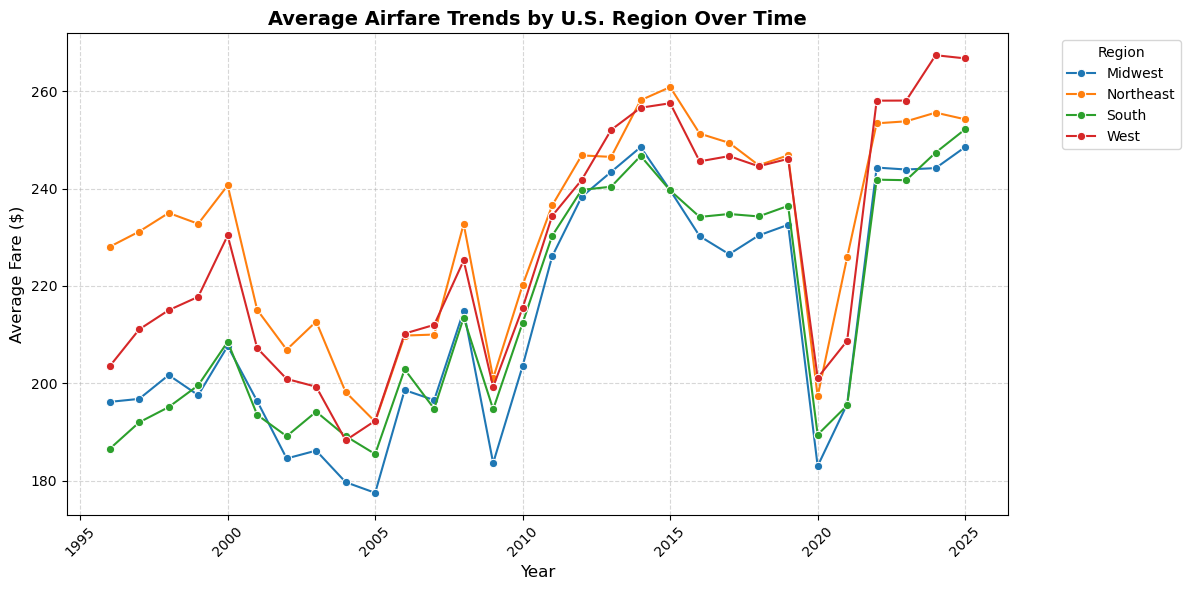

In [83]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=region_trends,
    x="Year",
    y="AvgFare_final",
    hue="OriginRegion",
    marker="o"
)

# Beautify the chart
plt.title("Average Airfare Trends by U.S. Region Over Time", fontsize=14, weight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

 ## 2. Do routes with more airlines competing show lower average fares than routes dominated by one or two carriers?

In [85]:
all_data["RouteID"] = (all_data["OriginCity"].astype(str) + "_" + all_data["DestCity"].astype(str))

In [86]:
all_data.tail(3)

,tbl,Year,Quarter,OriginCity,DestCity,OriginAirport,DestAirport,DistanceMiles,Passengers,AvgFare,...,OriginRegion,DestRegion,LargestCarrierName,LowestFareCarrierName,FareDifference,FareDifferencePct,YearQuarter,DistanceCategory,AvgFare_final,RouteID
250000,Table 4,1996,1,"Omaha, NE","St. Louis, MO",NaN,NaN,NaN,NaN,NaN,...,Midwest,Midwest,NaN,NaN,NaN,NaN,1996Q1,NaN,113.64,"Omaha, NE_St. Louis, MO"
250001,Table 4,1996,1,"Milwaukee, WI","San Francisco, CA (Metropolitan Area)",NaN,NaN,NaN,NaN,NaN,...,Midwest,West,NaN,NaN,NaN,NaN,1996Q1,NaN,175.39,"Milwaukee, WI_San Francisco, CA (Metropolitan ..."
250002,Table 4,1996,1,"New Orleans, LA","Tampa, FL (Metropolitan Area)",NaN,NaN,NaN,NaN,NaN,...,South,South,NaN,NaN,NaN,NaN,1996Q1,NaN,89.42,"New Orleans, LA_Tampa, FL (Metropolitan Area)"


In [87]:
all_data["CarrierList"] = all_data[["LargestCarrierName", "LowestFareCarrierName"]].values.tolist()

In [88]:
all_data.tail(3)

,tbl,Year,Quarter,OriginCity,DestCity,OriginAirport,DestAirport,DistanceMiles,Passengers,AvgFare,...,DestRegion,LargestCarrierName,LowestFareCarrierName,FareDifference,FareDifferencePct,YearQuarter,DistanceCategory,AvgFare_final,RouteID,CarrierList
250000,Table 4,1996,1,"Omaha, NE","St. Louis, MO",NaN,NaN,NaN,NaN,NaN,...,Midwest,NaN,NaN,NaN,NaN,1996Q1,NaN,113.64,"Omaha, NE_St. Louis, MO","[nan, nan]"
250001,Table 4,1996,1,"Milwaukee, WI","San Francisco, CA (Metropolitan Area)",NaN,NaN,NaN,NaN,NaN,...,West,NaN,NaN,NaN,NaN,1996Q1,NaN,175.39,"Milwaukee, WI_San Francisco, CA (Metropolitan ...","[nan, nan]"
250002,Table 4,1996,1,"New Orleans, LA","Tampa, FL (Metropolitan Area)",NaN,NaN,NaN,NaN,NaN,...,South,NaN,NaN,NaN,NaN,1996Q1,NaN,89.42,"New Orleans, LA_Tampa, FL (Metropolitan Area)","[nan, nan]"


In [89]:
all_data['LastYearFare'].value_counts()

LastYearFare
190.14    4
176.54    4
145.21    4
195.12    4
177.31    4
         ..
132.43    1
110.12    1
115.62    1
138.28    1
143.07    1
Name: count, Length: 5651, dtype: int64

In [90]:
all_data['CurrentPassengers'].value_counts()

CurrentPassengers
21410.0     7
21020.0     7
18210.0     6
18140.0     6
25920.0     6
           ..
99080.0     1
41680.0     1
19380.0     1
265370.0    1
221810.0    1
Name: count, Length: 4624, dtype: int64

In [91]:
all_data["LargestCarrierName"].unique()

array(['Allegiant Air', 'Delta Air Lines', 'Southwest Airlines',
       'American Airlines', 'United Airlines', 'JetBlue Airways',
       'Alaska Airlines', 'Frontier Airlines', 'Spirit Airlines',
       'Sun Country Airlines', 'Silver Airways', 'Breeze Airways', nan,
       'Avelo Airlines', 'US Airways', 'Continental Airlines',
       'America West Airlines', 'Midwest Airlines', 'AirTran Airways',
       'Northwest Airlines', 'Trans World Airlines',
       'Continental Express', 'Independence Air', 'ValuJet Airlines',
       'ATA Airlines', 'Midway Airlines', 'Chautauqua Airlines',
       'Pro Air', 'USA3000 Airlines', 'National Airlines',
       'Vanguard Airlines', 'Reno Air', 'Air South', 'Virgin America',
       'Kiwi International Air Lines', 'Western Pacific Airlines',
       'Harmony Airways', 'Tower Air', 'Air UK', 'Legend Airlines',
       'Republic Airlines', 'Pan American World Airways',
       'Carnival Air Lines', 'Mesa Airlines', 'Cape Air',
       'Boston-Maine Airways

In [92]:
all_data["NumCarriers"] = all_data["CarrierList"].apply(
    lambda x: len(set([c for c in x if pd.notnull(c)])))

In [93]:
all_data["NumCarriers"] = all_data["NumCarriers"].fillna(0)

In [94]:
all_data["NumCarriers"] = all_data["NumCarriers"].astype(int)

## all_data = all_data[all_data["NumCarriers"] > 0]

In [96]:
competition_summary = (all_data[all_data["NumCarriers"] > 0].groupby(["OriginRegion", "NumCarriers"])["AvgFare_final"].mean().reset_index())

In [97]:
competition_summary

,OriginRegion,NumCarriers,AvgFare_final
0,Midwest,1,195.628630
1,Midwest,2,225.442889
2,Northeast,1,218.311400
3,Northeast,2,243.938605
4,South,1,197.857368
5,South,2,230.892692
6,West,1,207.702198
7,West,2,244.329064


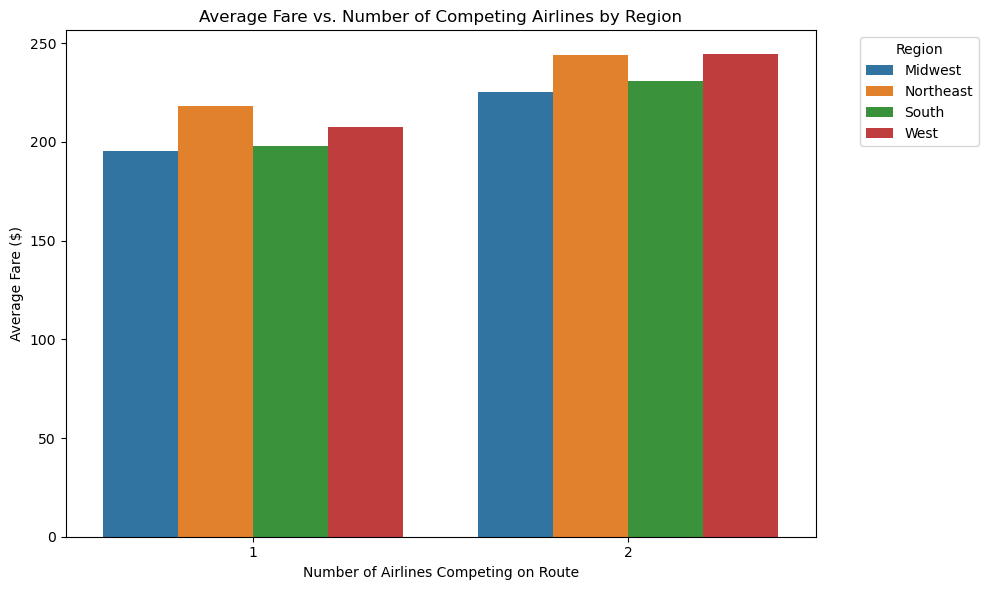

In [98]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=competition_summary,
    x="NumCarriers",
    y="AvgFare_final",
    hue="OriginRegion"
)
plt.title("Average Fare vs. Number of Competing Airlines by Region")
plt.xlabel("Number of Airlines Competing on Route")
plt.ylabel("Average Fare ($)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Across all U.S. regions, routes with one dominant carrier tend to show slightly lower average fares, while routes with two or more competing airlines often have higher fares, suggesting that competition alone doesn’t always drive prices down and may reflect longer or higher-demand routes.


In [100]:
all_data['CurrentPassengers'].value_counts()

CurrentPassengers
21410.0     7
21020.0     7
18210.0     6
18140.0     6
25920.0     6
           ..
99080.0     1
41680.0     1
19380.0     1
265370.0    1
221810.0    1
Name: count, Length: 4624, dtype: int64

## 3.  Are short-haul routes experiencing different trends than long-haul routes within each region?

In [102]:
dist_trends = (all_data.groupby(["Year", "OriginRegion", "DistanceCategory"])["AvgFare_final"].mean().reset_index())

In [103]:
dist_trends

,Year,OriginRegion,DistanceCategory,AvgFare_final
0,1996,Midwest,Long (>1500),246.554620
1,1996,Midwest,Medium (500-1500),191.164541
2,1996,Midwest,Short (<500),162.297828
3,1996,Northeast,Long (>1500),315.198548
4,1996,Northeast,Medium (500-1500),191.140196
...,...,...,...,...
355,2025,South,Medium (500-1500),245.615063
356,2025,South,Short (<500),215.274826
357,2025,West,Long (>1500),329.916975
358,2025,West,Medium (500-1500),221.911337


Text(0.5, 1.0, 'South')

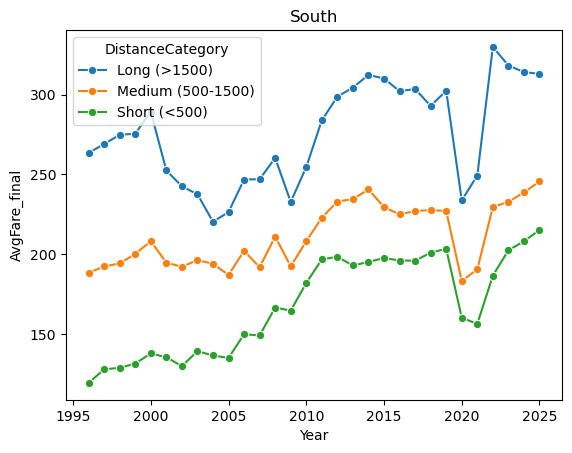

In [104]:
sns.lineplot(
    data=dist_trends[dist_trends["OriginRegion"] == "South"],
    x="Year",
    y="AvgFare_final",
    hue="DistanceCategory",
    marker="o",
)
plt.title("South")

Text(0.5, 1.0, 'West')

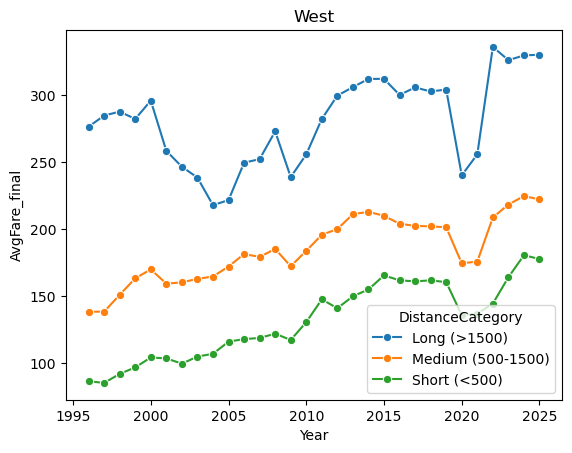

In [105]:
sns.lineplot(
    data=dist_trends[dist_trends["OriginRegion"] == "West"],
    x="Year",
    y="AvgFare_final",
    hue="DistanceCategory",
    marker="o"
)
plt.title("West")

Text(0.5, 1.0, 'Midwest')

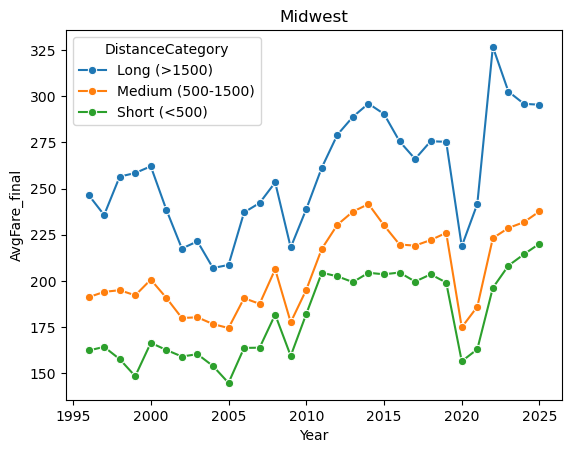

In [106]:
sns.lineplot(
    data=dist_trends[dist_trends["OriginRegion"] == "Midwest"],
    x="Year",
    y="AvgFare_final",
    hue="DistanceCategory",
    marker="o"
)
plt.title("Midwest")

Text(0.5, 1.0, 'Northeast')

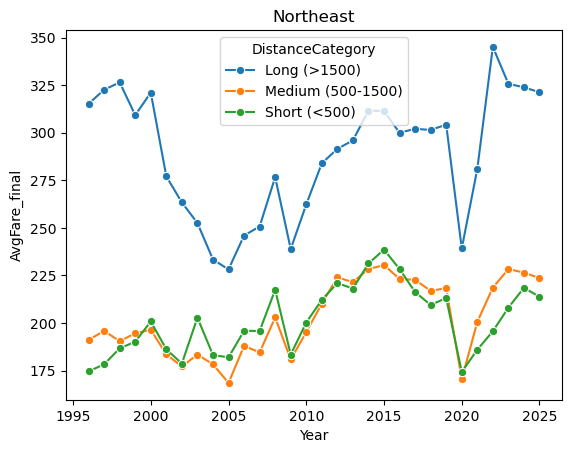

In [107]:
sns.lineplot(
    data=dist_trends[dist_trends["OriginRegion"] == "Northeast"],
    x="Year",
    y="AvgFare_final",
    hue="DistanceCategory",
    marker="o"
)
plt.title("Northeast")

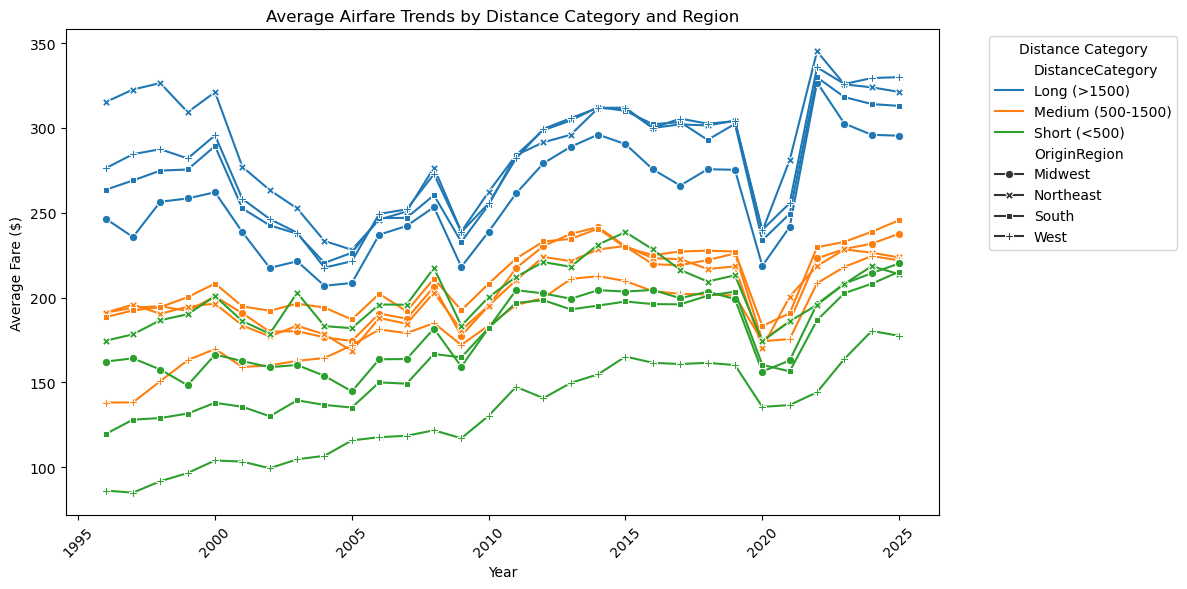

In [108]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=dist_trends,
    x="Year",
    y="AvgFare_final",
    hue="DistanceCategory",
    style="OriginRegion",
    markers=True,
    dashes=False
)

plt.xticks(rotation=45)
plt.ylabel("Average Fare ($)")
plt.title("Average Airfare Trends by Distance Category and Region")
plt.legend(title="Distance Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [109]:
all_data['CurrentPassengers'].value_counts()

CurrentPassengers
21410.0     7
21020.0     7
18210.0     6
18140.0     6
25920.0     6
           ..
99080.0     1
41680.0     1
19380.0     1
265370.0    1
221810.0    1
Name: count, Length: 4624, dtype: int64

## 4. Does the presence of low-cost carriers explain fare declines in some regions more than others?

In [111]:
all_data["AirlineName"]. value_counts()

AirlineName
Southwest Airlines Co.                       61870
American Airlines Inc.                       45377
Delta Air Lines Inc.                         33357
United Air Lines Inc.                        29884
JetBlue Airways                               6482
Alaska Airlines Inc.                          4235
Allegiant Air                                 2388
Spirit Air Lines                              1410
Frontier Airlines Inc.                        1344
Republic Airline                               877
Breeze Aviation Group DBA  Breeze              385
Jade Cargo International                       317
AirBridgeCargo Airlines Limited                198
Sun Country Airlines d/b/a MN Airlines         147
TEM Enterprises dba  Avelo Airlines            137
ANA & JP Express Co. Ltd.                       27
Mesa Airlines Inc.                              18
Cape Air                                        16
Silver Airways                                  13
Varig Logistica S/A

In [112]:
all_data["IsLowCost"] = all_data["AirlineName"].isin(["Southwest Airlines Co.",
    "Spirit Air Lines",
    "Frontier Airlines Inc.",
    "Allegiant Air",
    "JetBlue Airways",
    "Sun Country Airlines d/b/a MN Airlines",
    "TEM Enterprises dba  Avelo Airlines",
    "Breeze Aviation Group DBA  Breeze",
    "Varig Logistica S/A"]).astype(int)

In [113]:
all_data['IsLowCost'].value_counts()

IsLowCost
0    176352
1     73651
Name: count, dtype: int64

In [114]:
LowCost_trends = (all_data.groupby(["OriginRegion", "IsLowCost"])["AvgFare_final"].mean().reset_index())

In [115]:
all_data.columns

Index(['tbl', 'Year', 'Quarter', 'OriginCity', 'DestCity', 'OriginAirport',
       'DestAirport', 'DistanceMiles', 'Passengers', 'AvgFare',
       'LargestCarrier', 'LargestCarrierShare', 'LargestCarrierFare',
       'LowestFareCarrier', 'LowestCarrierShare', 'LowestCarrierFare',
       'CurrentPassengers', 'CurrentFare', 'LastYearFare',
       'LastYearPassengers', 'FareChange', 'FarePctChange', 'PassengerChange',
       'PassengerPctChange', 'CarrierCode', 'AirlineName', 'OriginState',
       'DestState', 'OriginRegion', 'DestRegion', 'LargestCarrierName',
       'LowestFareCarrierName', 'FareDifference', 'FareDifferencePct',
       'YearQuarter', 'DistanceCategory', 'AvgFare_final', 'RouteID',
       'CarrierList', 'NumCarriers', 'IsLowCost'],
      dtype='object')

In [116]:
LowCost_trends

,OriginRegion,IsLowCost,AvgFare_final
0,Midwest,0,222.622322
1,Midwest,1,182.726993
2,Northeast,0,241.457111
3,Northeast,1,204.271818
4,South,0,224.766537
5,South,1,187.992607
6,West,0,247.207157
7,West,1,189.453455


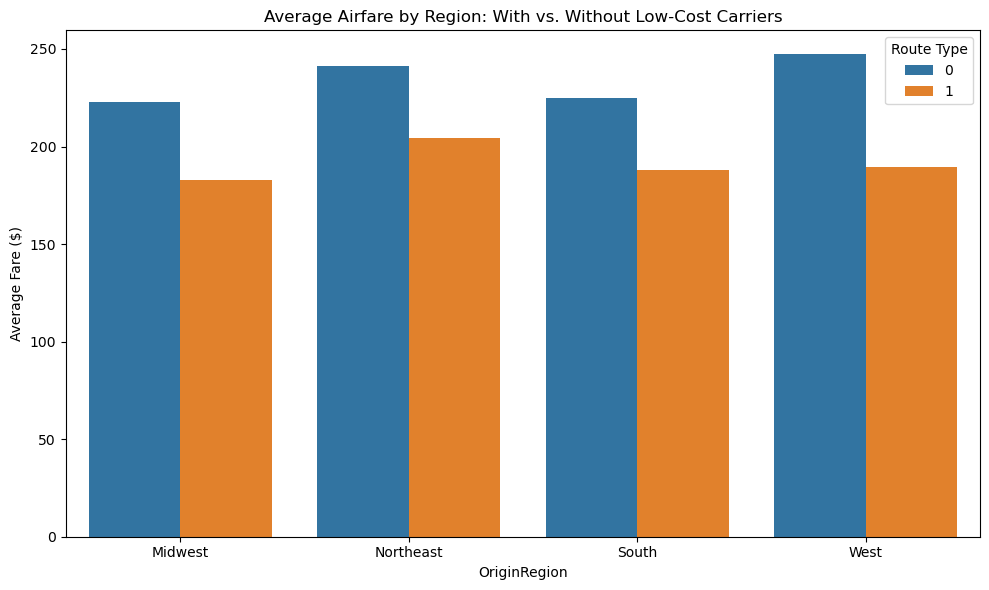

In [117]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=LowCost_trends,
    x="OriginRegion",
    y="AvgFare_final",
    hue="IsLowCost"
)
plt.ylabel("Average Fare ($)")
plt.title("Average Airfare by Region: With vs. Without Low-Cost Carriers")
plt.legend(title="Route Type")
plt.tight_layout()
plt.show()

Routes that include low-cost carriers show significantly lower average fares across all regions, about $30–$60 cheaper than routes without them. The effect is most noticeable in the West and South, suggesting that strong low-cost carrier presence in those regions drives more competitive pricing.

In [119]:
all_data['CurrentPassengers'].value_counts()

CurrentPassengers
21410.0     7
21020.0     7
18210.0     6
18140.0     6
25920.0     6
           ..
99080.0     1
41680.0     1
19380.0     1
265370.0    1
221810.0    1
Name: count, Length: 4624, dtype: int64

## 5.Which regions show less fluctuation versus volatility in fare changes?

In [121]:
region_fare_trends = all_data.groupby(["Year", "OriginRegion"])["AvgFare_final"].mean().reset_index()

In [122]:
region_fare_trends

,Year,OriginRegion,AvgFare_final
0,1996,Midwest,196.192798
1,1996,Northeast,228.046870
2,1996,South,186.539336
3,1996,West,203.502486
4,1997,Midwest,196.811473
...,...,...,...
115,2024,West,267.390385
116,2025,Midwest,248.529907
117,2025,Northeast,254.225244
118,2025,South,252.182714


In [123]:
region_volatility = region_fare_trends.groupby("OriginRegion")["AvgFare_final"].std().reset_index()

In [124]:
region_volatility

,OriginRegion,AvgFare_final
0,Midwest,24.057706
1,Northeast,20.707492
2,South,23.256416
3,West,24.391867


In [125]:
region_volatility = region_volatility.sort_values(by="AvgFare_final", ascending=True)

In [126]:
region_volatility

,OriginRegion,AvgFare_final
1,Northeast,20.707492
2,South,23.256416
0,Midwest,24.057706
3,West,24.391867


C:\Users\macad\AppData\Local\Temp\ipykernel_38448\2596426360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_volatility, x="OriginRegion", y="AvgFare_final"


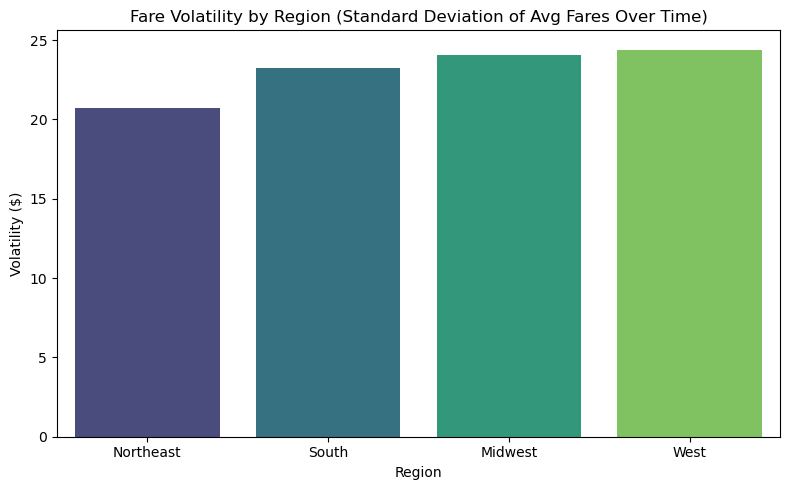

In [127]:
plt.figure(figsize=(8,5))
sns.barplot(data=region_volatility, x="OriginRegion", y="AvgFare_final"
            , palette="viridis")
plt.title("Fare Volatility by Region (Standard Deviation of Avg Fares Over Time)")
plt.ylabel("Volatility ($)")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

## Fares in the Northeast and South show the least volatility, suggesting more stable pricing over time. In contrast, the Midwest and West exhibit greater fluctuations, indicating higher fare variability across quarters.

all_data.to_csv('AirFareFinal.csv', index=False)

In [130]:
all_data

,tbl,Year,Quarter,OriginCity,DestCity,OriginAirport,DestAirport,DistanceMiles,Passengers,AvgFare,...,LowestFareCarrierName,FareDifference,FareDifferencePct,YearQuarter,DistanceCategory,AvgFare_final,RouteID,CarrierList,NumCarriers,IsLowCost
0,Table1a,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,PIE,970.0,180.0,81.43,...,Allegiant Air,0.00,0.00,2021Q3,Medium (500-1500),81.43,"Allentown/Bethlehem/Easton, PA_Tampa, FL (Metr...","[Allegiant Air, Allegiant Air]",1,1
1,Table1a,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,TPA,970.0,19.0,208.93,...,United Airlines,65.87,42.74,2021Q3,Medium (500-1500),214.46,"Allentown/Bethlehem/Easton, PA_Tampa, FL (Metr...","[Delta Air Lines, United Airlines]",2,0
2,Table1a,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DAL,580.0,204.0,184.56,...,Southwest Airlines,0.00,0.00,2021Q3,Medium (500-1500),184.50,"Albuquerque, NM_Dallas/Fort Worth, TX","[Southwest Airlines, Southwest Airlines]",1,1
3,Table1a,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DFW,580.0,264.0,182.64,...,American Airlines,0.00,0.00,2021Q3,Medium (500-1500),182.86,"Albuquerque, NM_Dallas/Fort Worth, TX","[American Airlines, American Airlines]",1,0
4,Table1a,2021,3,"Albuquerque, NM","Phoenix, AZ",ABQ,PHX,328.0,398.0,177.11,...,American Airlines,18.72,11.29,2021Q3,Short (<500),180.80,"Albuquerque, NM_Phoenix, AZ","[Southwest Airlines, American Airlines]",2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249998,Table 4,1996,1,"Kansas City, MO","Salt Lake City, UT",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1996Q1,NaN,84.60,"Kansas City, MO_Salt Lake City, UT","[nan, nan]",0,0
249999,Table 4,1996,1,"Omaha, NE","Phoenix, AZ",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1996Q1,NaN,77.52,"Omaha, NE_Phoenix, AZ","[nan, nan]",0,0
250000,Table 4,1996,1,"Omaha, NE","St. Louis, MO",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1996Q1,NaN,113.64,"Omaha, NE_St. Louis, MO","[nan, nan]",0,0
250001,Table 4,1996,1,"Milwaukee, WI","San Francisco, CA (Metropolitan Area)",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1996Q1,NaN,175.39,"Milwaukee, WI_San Francisco, CA (Metropolitan ...","[nan, nan]",0,0


In [131]:
all_data.shape

(250003, 41)

In [132]:
all_data['CurrentPassengers'].value_counts()

CurrentPassengers
21410.0     7
21020.0     7
18210.0     6
18140.0     6
25920.0     6
           ..
99080.0     1
41680.0     1
19380.0     1
265370.0    1
221810.0    1
Name: count, Length: 4624, dtype: int64

In [133]:
##all_data.to_csv('AirFareFinal.csv', index=False)

In [134]:
state_map = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas",
    "CA": "California", "CO": "Colorado", "CT": "Connecticut","DC":"District of Columbia", "DE": "Delaware",
    "FL": "Florida", "GA": "Georgia", "HI": "Hawaii", "ID": "Idaho",
    "IL": "Illinois", "IN": "Indiana", "IA": "Iowa", "KS": "Kansas",
    "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi",
    "MO": "Missouri", "MT": "Montana", "NE": "Nebraska", "NV": "Nevada",
    "NH": "New Hampshire", "NJ": "New Jersey", "NM": "New Mexico", "NY": "New York",
    "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio", "OK": "Oklahoma",
    "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island",
    "SC": "South Carolina", "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas",
    "UT": "Utah", "VT": "Vermont", "VA": "Virginia", "WA": "Washington",
    "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming"
}

In [135]:
all_data["OriginStateFull"] = all_data["OriginState"].map(state_map)
all_data["DestStateFull"] = all_data["DestState"].map(state_map)

In [136]:
all_data["OriginStateFull"].value_counts()

OriginStateFull
Texas                   36699
California              31227
New York                28278
Massachusetts           23787
Illinois                18397
Ohio                    17519
Florida                 15607
North Carolina           6073
Michigan                 5777
Colorado                 5259
Georgia                  5056
Tennessee                4682
South Carolina           4577
Missouri                 3865
Nevada                   3685
New Mexico               3246
Alabama                  3190
Wisconsin                2806
Indiana                  2691
Arizona                  2531
Connecticut              2136
Virginia                 2010
Oregon                   1979
Louisiana                1884
Arkansas                 1868
Minnesota                1851
Kentucky                 1806
Iowa                     1772
Pennsylvania             1705
Idaho                    1257
Washington               1013
Oklahoma                  990
Nebraska                

In [137]:
all_data.columns

Index(['tbl', 'Year', 'Quarter', 'OriginCity', 'DestCity', 'OriginAirport',
       'DestAirport', 'DistanceMiles', 'Passengers', 'AvgFare',
       'LargestCarrier', 'LargestCarrierShare', 'LargestCarrierFare',
       'LowestFareCarrier', 'LowestCarrierShare', 'LowestCarrierFare',
       'CurrentPassengers', 'CurrentFare', 'LastYearFare',
       'LastYearPassengers', 'FareChange', 'FarePctChange', 'PassengerChange',
       'PassengerPctChange', 'CarrierCode', 'AirlineName', 'OriginState',
       'DestState', 'OriginRegion', 'DestRegion', 'LargestCarrierName',
       'LowestFareCarrierName', 'FareDifference', 'FareDifferencePct',
       'YearQuarter', 'DistanceCategory', 'AvgFare_final', 'RouteID',
       'CarrierList', 'NumCarriers', 'IsLowCost', 'OriginStateFull',
       'DestStateFull'],
      dtype='object')

In [138]:
##all_data.to_csv('AirFareFinal3.csv', index=False)

In [139]:
all_data['FarePctChange'].value_counts()

FarePctChange
-0.3162    7
-0.2018    6
 0.3036    6
-0.3014    6
-0.3674    5
          ..
 0.3530    1
 0.3591    1
 0.3198    1
 0.3849    1
-0.4714    1
Name: count, Length: 4626, dtype: int64